文件中各行的格式为JSON（JavaScript Object Notation）

In [1]:
path ='../dataset/datasets/bitly_usagov/example.txt'

In [2]:
#打开文件的第一行
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
#python中内置了很多第三方的模块，可以将JSON字符串转化成python字典对象
import  json
path ='../dataset/datasets/bitly_usagov/example.txt'
recodes =[json.loads(line) for line in open(path)]

In [5]:
recodes[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [6]:
recodes[0]['tz']

'America/New_York'

In [8]:
print (recodes[0]['tz'])

America/New_York


用纯代码对时区进行计数


In [10]:
time_zones =[rec['tz'] for rec in recodes if 'tz' in rec]

In [11]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [15]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

    

In [13]:
from collections import defaultdict
#这个模块实现了特定目标的容器，以提供Python标准内建容器 dict、list、set、tuple 的替代选择
#defaultdict：字典的子类，提供了一个工厂函数，为字典查询提供了默认值
#defaultdict的一个典型用法是使用其中一种内置类型(如str、int、list或dict)作为默认工厂，因为这些内置类型在没有参数调用时返回空类型。

In [14]:
def get_counts2(sequence):
    counts=defaultdict(int)
    for x in sequence:
        counts[x]+=1
    return counts

In [16]:
counts =get_counts(time_zones)


In [17]:
counts['America/New_York']

1251

In [20]:
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [18]:
len(time_zones)

3440

In [19]:
#对前十位的时区及其计数值，需要有关字典的处理技巧
def top_counts(count_dict,n=10):
    value_key_pairs =[(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [22]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [23]:
from collections import Counter
#Counter：字典的子类，提供了可哈希对象的计数功能
#Counter是一个dict子类，主要是用来对你访问的对象的频率进行计数。
# elements()：返回一个迭代器，每个元素重复计算的个数，如果一个元素的计数小于1,就会被忽略。
# most_common([n])：返回一个列表，提供n个访问频率最高的元素和计数

In [24]:
counts =Counter(time_zones)

In [25]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

用pandas对时区进行计数

In [2]:
from pandas import DataFrame,Series
import pandas as pd 
import numpy as np

In [28]:
frame =DataFrame(recodes)

In [29]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [30]:
frame['tz'][:10]


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [31]:
tz_counts =frame['tz'].value_counts()
#value_counts方法，进行统计

In [32]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [33]:
#给记录中的缺失的时区值进行一个填充，fillna函数可以进行替换缺失值(NA)
#未知的就可以通过布尔型数组索引来加以替换
clean_tz =frame['tz'].fillna('Missing')

In [34]:
clean_tz[clean_tz==' '] ='Unknown'

In [35]:
tz_counts =clean_tz.value_counts()

In [36]:
tz_counts[:20]

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
Missing                  120
Europe/London             74
Asia/Tokyo                37
Pacific/Honolulu          36
Europe/Madrid             35
America/Sao_Paulo         33
Europe/Berlin             28
Europe/Rome               27
America/Rainy_River       25
Europe/Amsterdam          22
America/Indianapolis      20
America/Phoenix           20
Europe/Warsaw             16
America/Mexico_City       15
Europe/Paris              14
Name: tz, dtype: int64

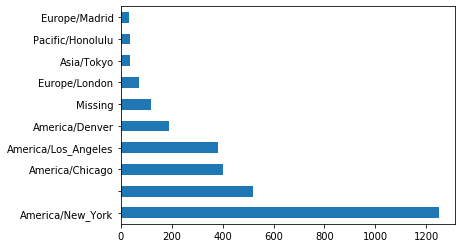

In [38]:
import pylab
#pylab 模块是一款由python提供的可以绘制二维，三维数据的工具模块
tz_counts[:10].plot(kind ='barh',rot=0)

In [40]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [41]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [42]:
#将字符串的第一节分离出来并得到另外一份用户的行为摘要
results =Series([x.split()[0] for x in frame.a.dropna()])

In [43]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [44]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [51]:
#按照windows用户和非windos用户来进行分类，首先我们需要进行将一些缺失的值删除掉
cframe =frame[frame.a.notnull()]

In [52]:
operating_system =np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [53]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [54]:
by_tz_os =cframe.groupby(['tz',operating_system])

In [55]:
agg_counts =by_tz_os.size().unstack().fillna(0)

In [56]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [57]:
#选取最常见的时区
indexer =agg_counts.sum(1).argsort()

In [58]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [59]:
count_subset =agg_counts.take(indexer)[-10:]

In [60]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


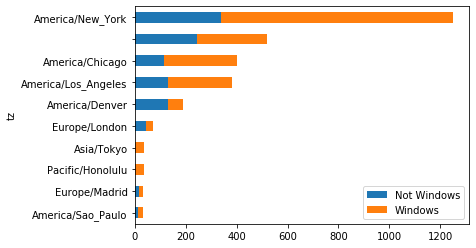

In [61]:
count_subset.plot(kind='barh',stacked=True)

In [62]:
normed_subset =count_subset.div(count_subset.sum(1),axis=0)

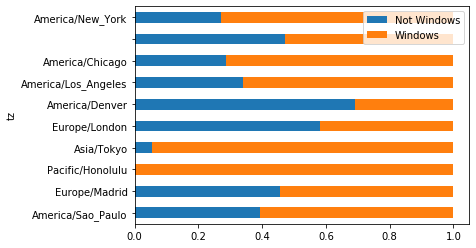

In [63]:
normed_subset.plot(kind='barh',stacked=True)

关于电影数据的一些处理

In [3]:
#注意空格
unames =['user_id','gender','age','occupation','zip']
users =pd.read_table('../dataset/datasets/movielens/users.dat',sep='::',header=None,names=unames)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
users['user_id'][:5]

0    1
1    2
2    3
3    4
4    5
Name: user_id, dtype: int64

In [6]:
rnames =['user_id','movie_id','rating','timestamp']
ratings =pd.read_table('../dataset/datasets/movielens/ratings.dat',sep='::',header=None,names=rnames)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
ratings['user_id'][:5]

0    1
1    1
2    1
3    1
4    1
Name: user_id, dtype: int64

In [9]:
mnames =['movie_id','title','genres']
movies =pd.read_table('../dataset/datasets/movielens/movies.dat',sep='::',header=None,names=mnames)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [91]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [72]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
users.columns

Index(['user_id ', 'gender', 'age', 'occupation', 'zip'], dtype='object')

In [160]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
#将数据进行合并
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
#      left_index=False, right_index=False, sort=True,
#      suffixes=('_x', '_y'), copy=True, indicator=False,
#      validate=None) 
data =pd.merge(pd.merge(ratings,users),movies)

In [182]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [184]:
data.ix[0]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [11]:
#使用 pivot_table方法 ，来进行按性别计算每部电影的平均得分
#聚合数据中的行，aggfunc的方法是作用于values的
mean_ratings =data.pivot_table(index=['title'],values='rating',columns='gender',aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [12]:
#过滤掉一定的数据
ratings_by_title =data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [13]:
#少于250 的进行一个过滤
active_titles =ratings_by_title.index[ratings_by_title>=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [14]:
mean_ratings =mean_ratings.ix[active_titles]
mean_ratings

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [15]:
#为了了解女性最喜欢的电影，进行降序排列
top_female_rating =mean_ratings.sort_index(by='F',ascending=False)
top_female_rating[:10]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [16]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']


In [17]:
sorted_by_diff =mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [18]:
#对结果进行反序取出，就能得到男性观众最喜欢的电影
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [19]:
#如果只是想找出分歧最大的电影，可以计算方差或标准差
#根据电影名称分组的得分数据的标准差
ratings_std_by_title =data.groupby('title')['rating'].std()

In [20]:
#根据active_title进行过滤
ratings_std_by_title =ratings_std_by_title.ix[active_titles]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [23]:
#根据值对Series进行降序排列
#注 在python3.6之后的版本中，order方法被弃用
#ratings_std_by_title.order(ascending=False)[:10]
ratings_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

1880-2010年间全美婴儿姓名

In [26]:
names1880 =pd.read_csv('../dataset/datasets/babynames/yob1880.txt',names=['name','sex','births'])

In [27]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [28]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [29]:
#现在将所有的数据集集中到一个DataFrame中
years =range(1880,2011)
pieces =[]
columns=['name','sex','births']

for year in years:
    path ='../dataset/datasets/babynames/yob%d.txt' % year
    frame =pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
    

In [30]:
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],            name sex  births  year
 0          Mary   F    8149  1882
 1          Anna   F    3143  1882
 

In [31]:
#将数据整合到一个DataFrame中
#concat 默认是按行将多个Dataframe组合到一起
#不希望保留原始的返回的数据的行号，所以指定ignore_index=True

names =pd.concat(pieces,ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [32]:
#通过pivot_table来对birth在year和sex级别上进行聚合
total_births =names.pivot_table(values='births',index='year',columns='sex',aggfunc=sum)

In [33]:
#返回数据的最后n行tail(n=?) default为5行
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


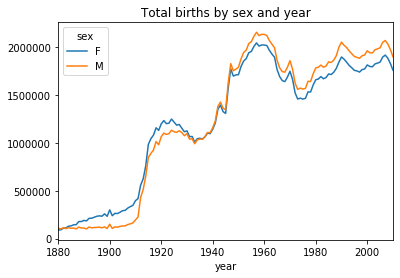

In [34]:
import pylab
total_births.plot(title='Total births by sex and year')

In [35]:
#指定名字的婴儿数相对于总出生数的比例
def add_prop(group):
    births =group.births.astype(float)
#转换births的数据类型
    group['prop']=births / births.sum()
    return group
#按year和sex分组，然后将新列添加到各个分组中
names =names.groupby(['year','sex']).apply(add_prop)

In [36]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [37]:
#验证每个分组中的prop的总和是否为1，可以用np.allclose来检查这个分组
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [38]:
#为了进一步的分析，需要取出该数据的一个子集：每对year/sex组合的前1000个名字，这是一个分组操作
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]

In [39]:
grouped =names.groupby(['year','sex'])
top1000 =grouped.apply(get_top1000)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

分析命名的趋势

In [45]:
#首先将前1000个名字分为男女两个部分
boys =top1000[top1000.sex =='M']
girls =top1000[top1000.sex =='F']

In [43]:
#ValueError: 'year' is both an index level and a column label, which is ambiguous.
#需要删除和左侧的index
top1000 =top1000.droplevel('year')


In [44]:
top1000

name sex  births  year      prop
sex                                               
F   0             Mary   F    7065  1880  0.077643
    1             Anna   F    2604  1880  0.028618
    2             Emma   F    2003  1880  0.022013
    3        Elizabeth   F    1939  1880  0.021309
    4           Minnie   F    1746  1880  0.019188
...                ...  ..     ...   ...       ...
M   1677639     Camilo   M     194  2010  0.000102
    1677640     Destin   M     194  2010  0.000102
    1677641     Jaquan   M     194  2010  0.000102
    1677642     Jaydan   M     194  2010  0.000102
    1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [46]:
total_births =top1000.pivot_table(values='births',index='year',columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260A875DC88>,
      dtype=object)

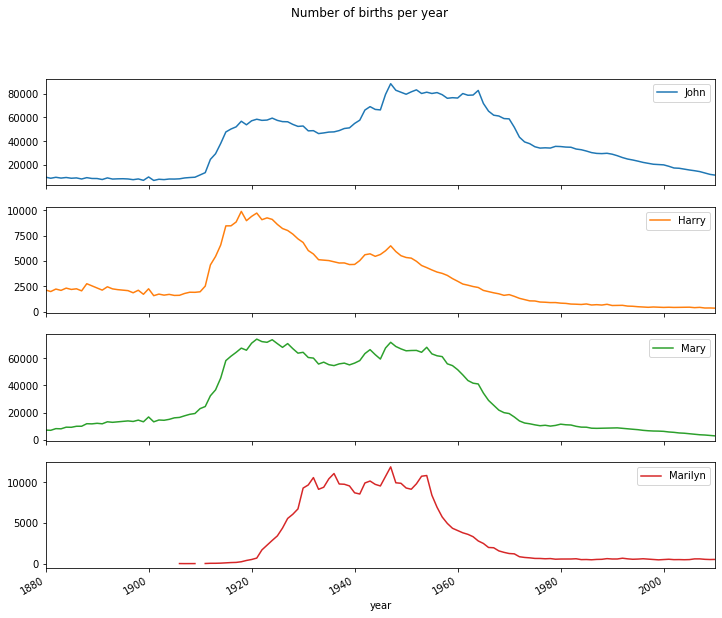

In [49]:
subset.plot(subplots=True ,figsize=(12,10),grid=False,title="Number of births per year")

评估命名多样性的增长

In [51]:
top1000 =top1000.droplevel('sex')
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1677639,Camilo,M,194,2010,0.000102
1677640,Destin,M,194,2010,0.000102
1677641,Jaquan,M,194,2010,0.000102
1677642,Jaydan,M,194,2010,0.000102


In [52]:
table =top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc=sum)

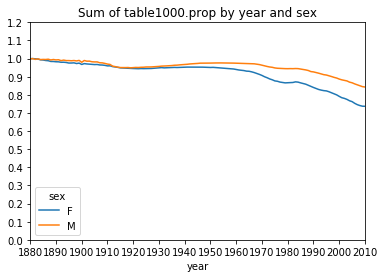

In [53]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [54]:
df =boys[boys.year ==2010]

In [55]:
df

name sex  births  year      prop
sex                                             
M   1676644    Jacob   M   21875  2010  0.011523
    1676645    Ethan   M   17866  2010  0.009411
    1676646  Michael   M   17133  2010  0.009025
    1676647   Jayden   M   17030  2010  0.008971
    1676648  William   M   16870  2010  0.008887
...              ...  ..     ...   ...       ...
    1677639   Camilo   M     194  2010  0.000102
    1677640   Destin   M     194  2010  0.000102
    1677641   Jaquan   M     194  2010  0.000102
    1677642   Jaydan   M     194  2010  0.000102
    1677645   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [56]:
#我们在对prop进行降序排列之后，先计算prop的累计和cumsum，通过serchsorted方法找出0.5应该被插入的位置
prop_cumsum =df.sort_index(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


sex         
M    1676644    0.011523
     1676645    0.020934
     1676646    0.029959
     1676647    0.038930
     1676648    0.047817
     1676649    0.056579
     1676650    0.065155
     1676651    0.073414
     1676652    0.081528
     1676653    0.089621
Name: prop, dtype: float64

In [57]:
prop_cumsum.searchsorted(0.5)

116

In [58]:
#由于索引是从0开始的，因此我们要将结果进行加1处理。
df =boys[boys.year==1900]

In [59]:
in1900 =df.sort_index(by='prop',ascending=False).prop.cumsum()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [60]:
in1900.searchsorted(0.5)+1

25

In [63]:
def get_quantile_count(group,q=0.5):
    group =group.sort_index(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)+1
diversity =top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity =diversity.unstack('sex')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [64]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


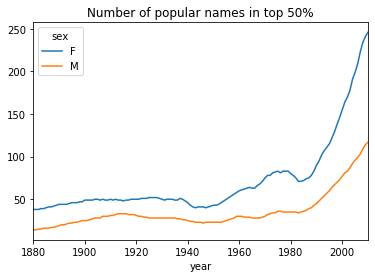

In [65]:
diversity.plot(title ="Number of popular names in top 50%")

"最后一个字母"的变革

In [71]:
#从name 列取出最后一个字母
get_last_letter =lambda x: x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table =names.pivot_table(values='births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [74]:
subtable =table.reindex(columns=[1910,1960,2010],level='year')

In [75]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [76]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [77]:
letter_prop =subtable /subtable.sum().astype(float)

In [78]:
#进行图形化的处理
import matplotlib.pyplot as plt


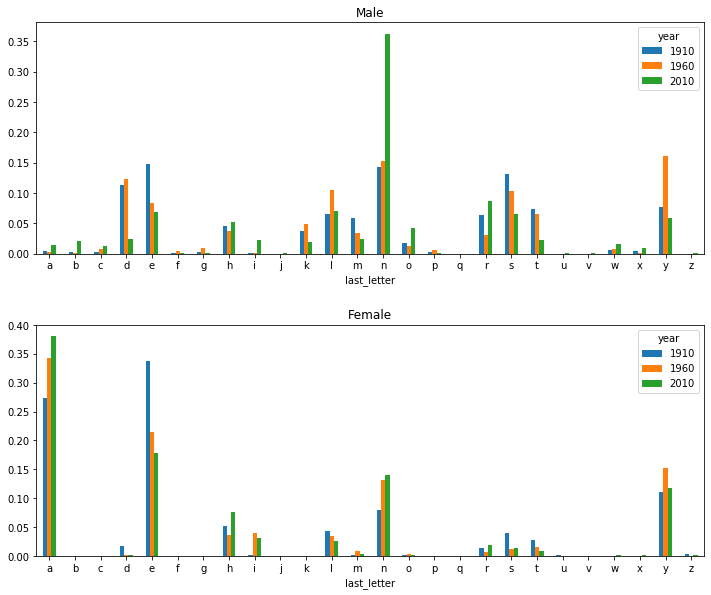

In [85]:
fig, axes =plt.subplots(2,1,figsize=(10,8))
#编译时图可能产生重叠，所以需要调整两张子图的行间距
fig.tight_layout(h_pad=5)
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')

In [86]:
letter_prop =table /table.sum().astype(float)

In [87]:
dny_ts =letter_prop.ix[['d','n','y'],'M'].T

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


In [88]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


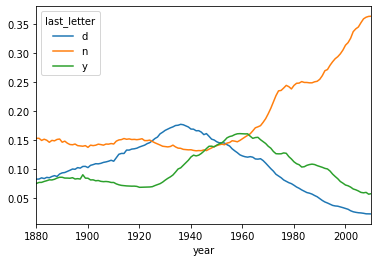

In [89]:
#通过plot绘制一张趋势图
dny_ts.plot()

In [90]:
#变成女孩名字的男生名字
all_names =top1000.name.unique()

In [91]:
mask =np.array(['lesl' in x.lower() for x in all_names])

In [92]:
lesley_like =all_names[mask]

In [93]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [94]:
filterd=top1000[top1000.name.isin(lesley_like)]

In [95]:
filterd.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [96]:
#按性别进行聚合，并按年度进行规范化处理

table=filterd.pivot_table(values='births',index='year',columns='sex',aggfunc='sum')

In [97]:
table =table.div(table.sum(1),axis=0)

In [98]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


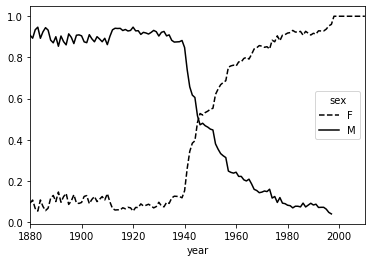

In [100]:
table.plot(style={'M':'k-','F':'k--'})